<a href="https://colab.research.google.com/github/egp4aq/DS-2002-Homeowrk/blob/main/Peterson_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [127]:
! git clone https://www.github.com/DS3001/assignment3

fatal: destination path 'assignment3' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
# Q1 1
df = pd.read_csv('/content/assignment3/data/car_data.csv')
print(df.columns)
df.head()

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [130]:
# Q1 2
df.describe() #summarize the variables

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [131]:
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [132]:
# create dummy variable
df['dum'] = 0
df.loc[df['Gender'] == 'Female', 'dum'] = 1
df['dum'].value_counts()

1    516
0    484
Name: dum, dtype: int64

In [133]:
# create a matrix
x_array = ['Age','AnnualSalary'] # array of predictors
x = df.loc[:,x_array]
y = df['Purchased']

In [134]:
# Q1 3
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return(x)

x = x.apply(maxmin)
x.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [135]:
# Q1 4
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=100)

[ 8 10 14]


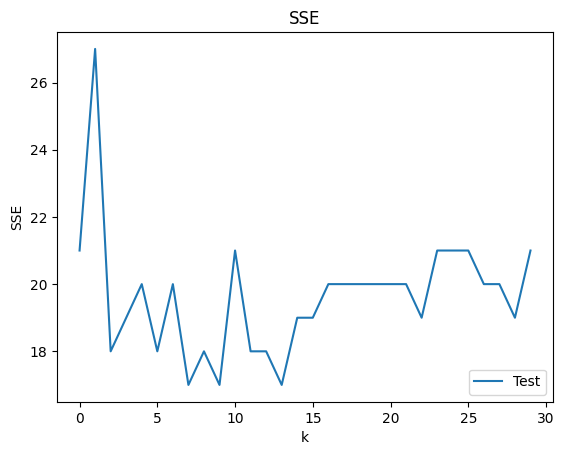

In [136]:
# Q1 5
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier
k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
for k in range(k_bar):
    model = kNNClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(x_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(x_test) # Predict values for test set
    SSE[k] = np.sum((y_test-y_hat)**2) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)
plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

In [137]:
# Q1 6
model = kNNClassifier(n_neighbors = 6) # using the optimal number found in last part
fitted_model = model.fit(x_train,y_train)
y_hat = fitted_model.predict(x_test)

pd.crosstab(y_test,y_hat)

col_0,0,1
Purchased,,
0,105,14
1,4,77


There are 4 times where 1's go to 0 and 14 times when 0's go to 1. Although this is not perfect, overall this means 18/200 = 0.09 is inaccurate, or in other words, there is a 91% accuracy.

In [138]:
# Q1 7
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
x = df.loc[:,vars]
y = df['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=1)
model = kNNClassifier(n_neighbors=6)
fitted_model = model.fit(x_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(x_test.drop('Gender',axis=1))
y_hat_M = y_hat[x_test['Gender'] == 'Male']
y_hat_F = y_hat[x_test['Gender'] == 'Female']
y_M = y_test[x_test['Gender'] == 'Male']
y_F = y_test[x_test['Gender'] == 'Female']

In [139]:
pd.crosstab(y_F, y_hat_F) # female

col_0,0,1
Purchased,,
0,59,3
1,14,33


In [140]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,61,2
1,11,17


The inaccuracy for women is 0.156 whereas the inaccuracy for men is 0.143. This shows that the model does a slightly better job at predicting male customer behavior than female customer behavior.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [141]:
# Q2 1
df2 = pd.read_csv('/content/assignment3/data/USA_cars_datasets.csv')
sub_df2 = df2[['price','year','mileage']]
nas = sub_df2.isnull()
print(nas.sum())

df2.head()

price      0
year       0
mileage    0
dtype: int64


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


There are no NA's to handle.

In [156]:
# Q2 2
x = sub_df2['year']
x2 = sub_df2['mileage']

x = (x-x.min())/(x.max()-x.min())
x2 = (x2-x2.min())/(x2.max()-x2.min())

sub_df2.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [155]:
# Q2 3
from sklearn.model_selection import train_test_split
x = sub_df2[['year','mileage']]
y = sub_df2[['price']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=100)
print(x_train.shape)
print(y_train.shape)

(1999, 2)
(1999, 1)


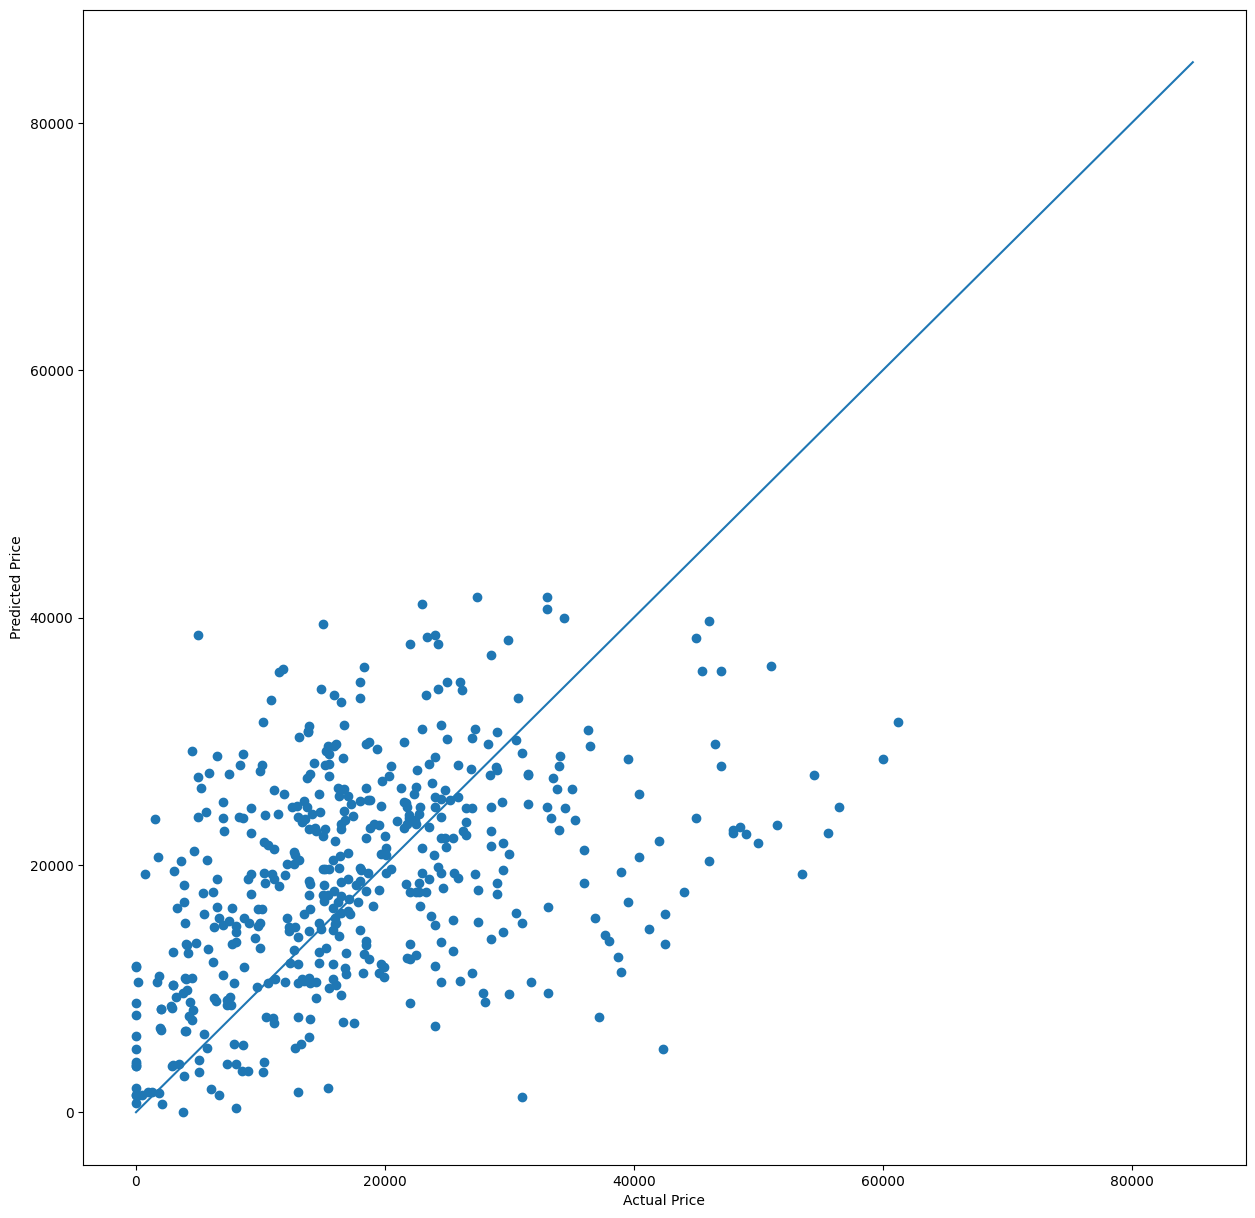

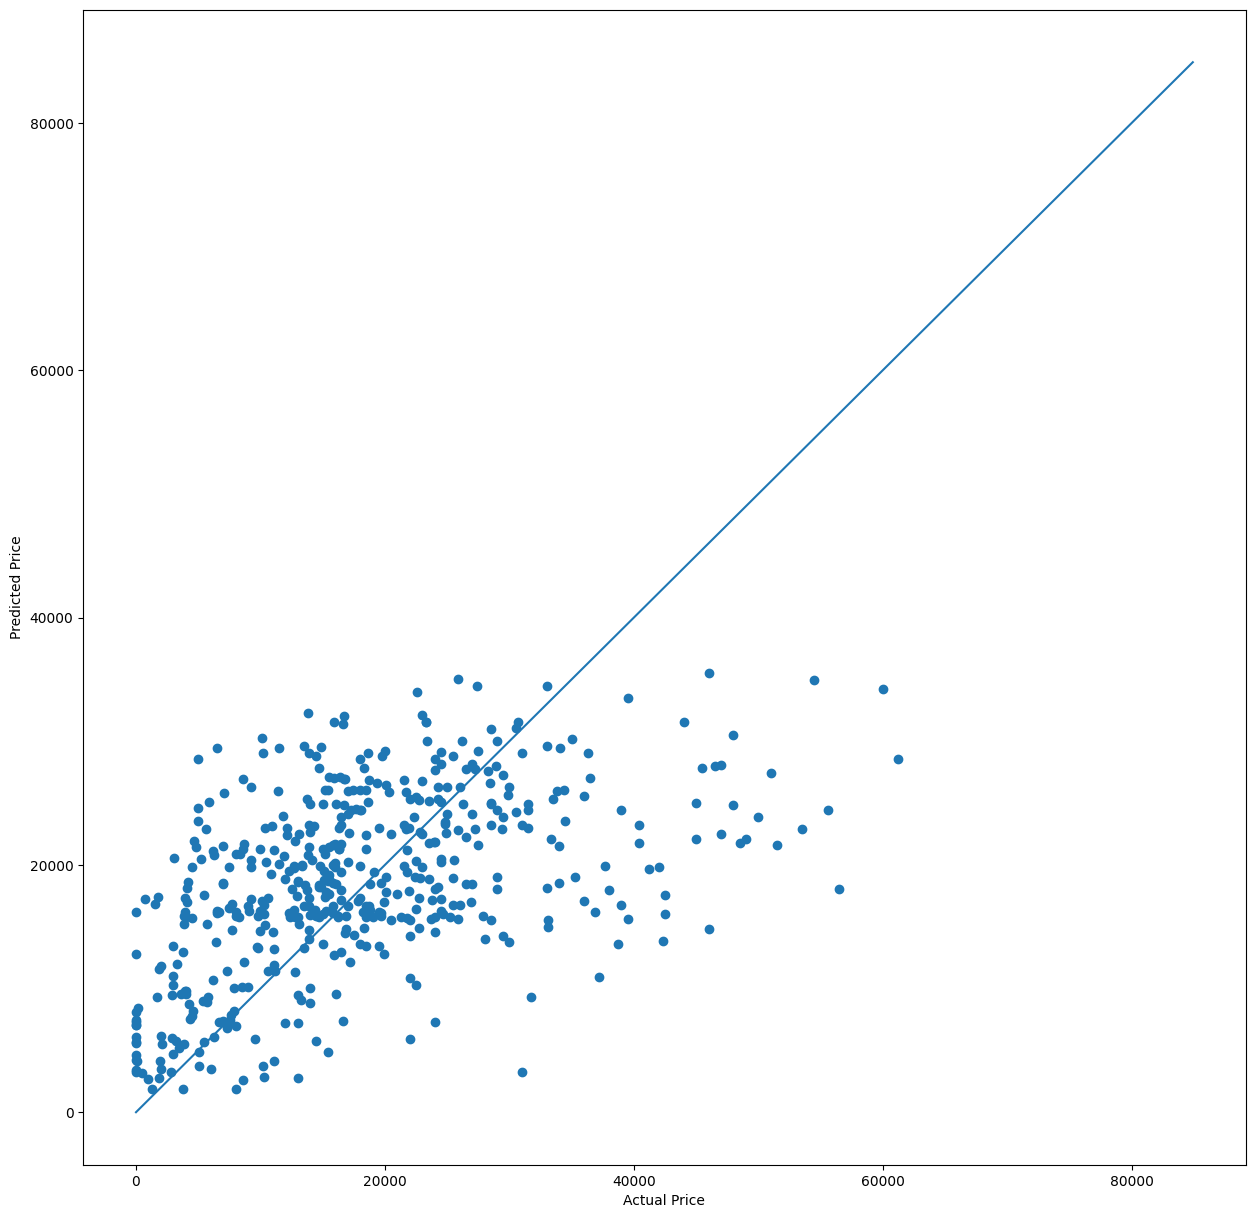

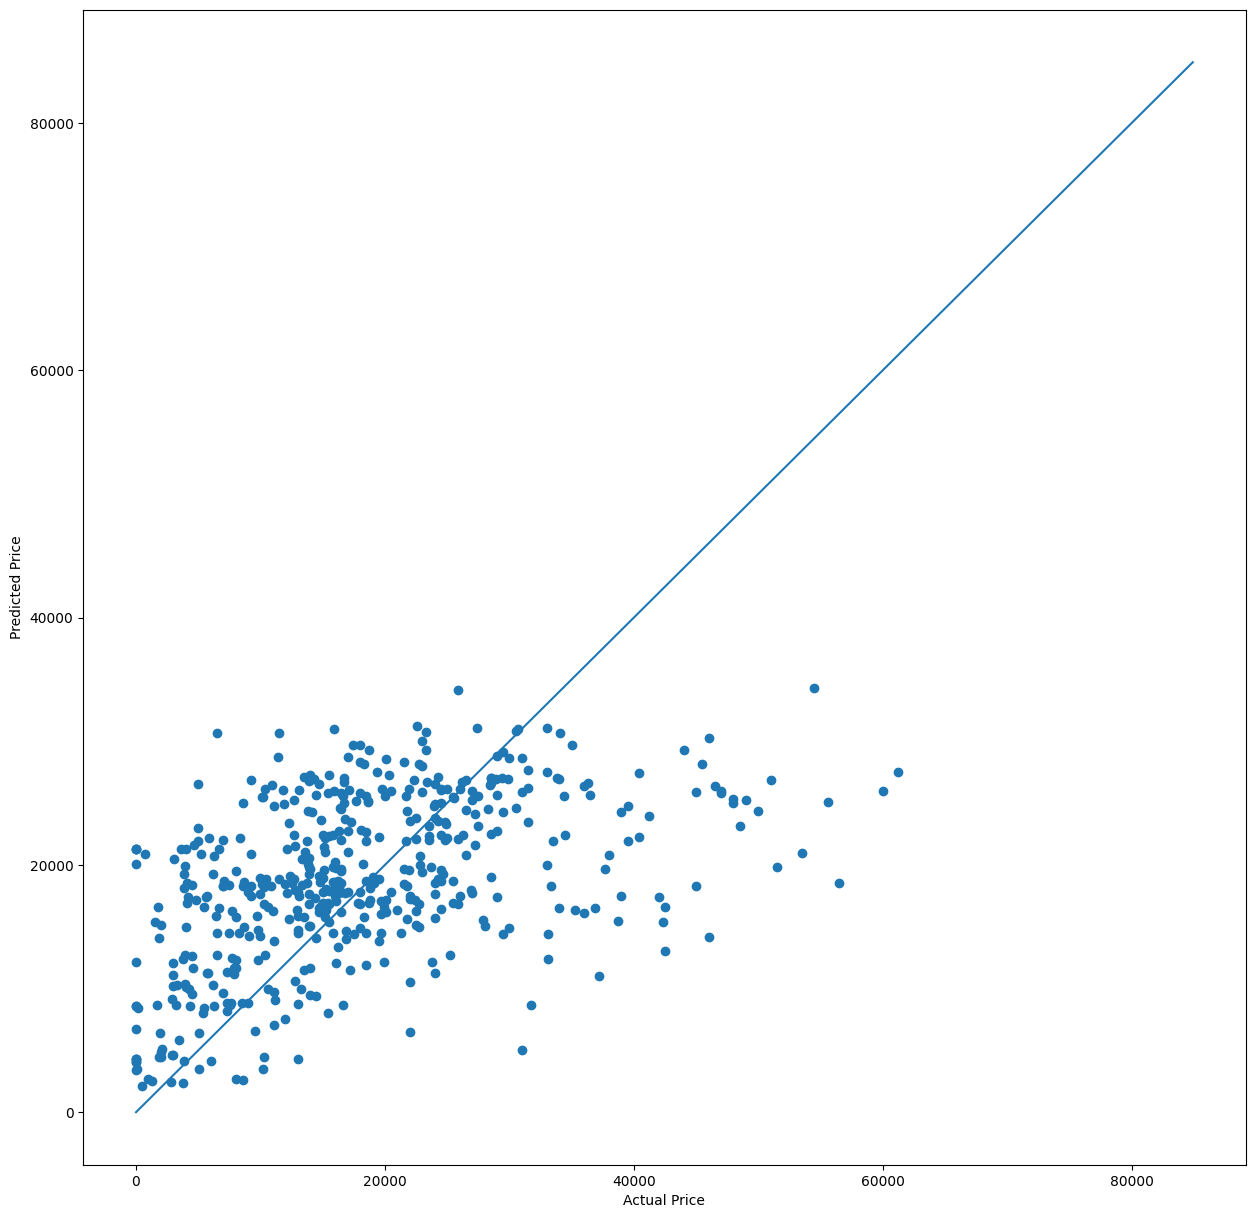

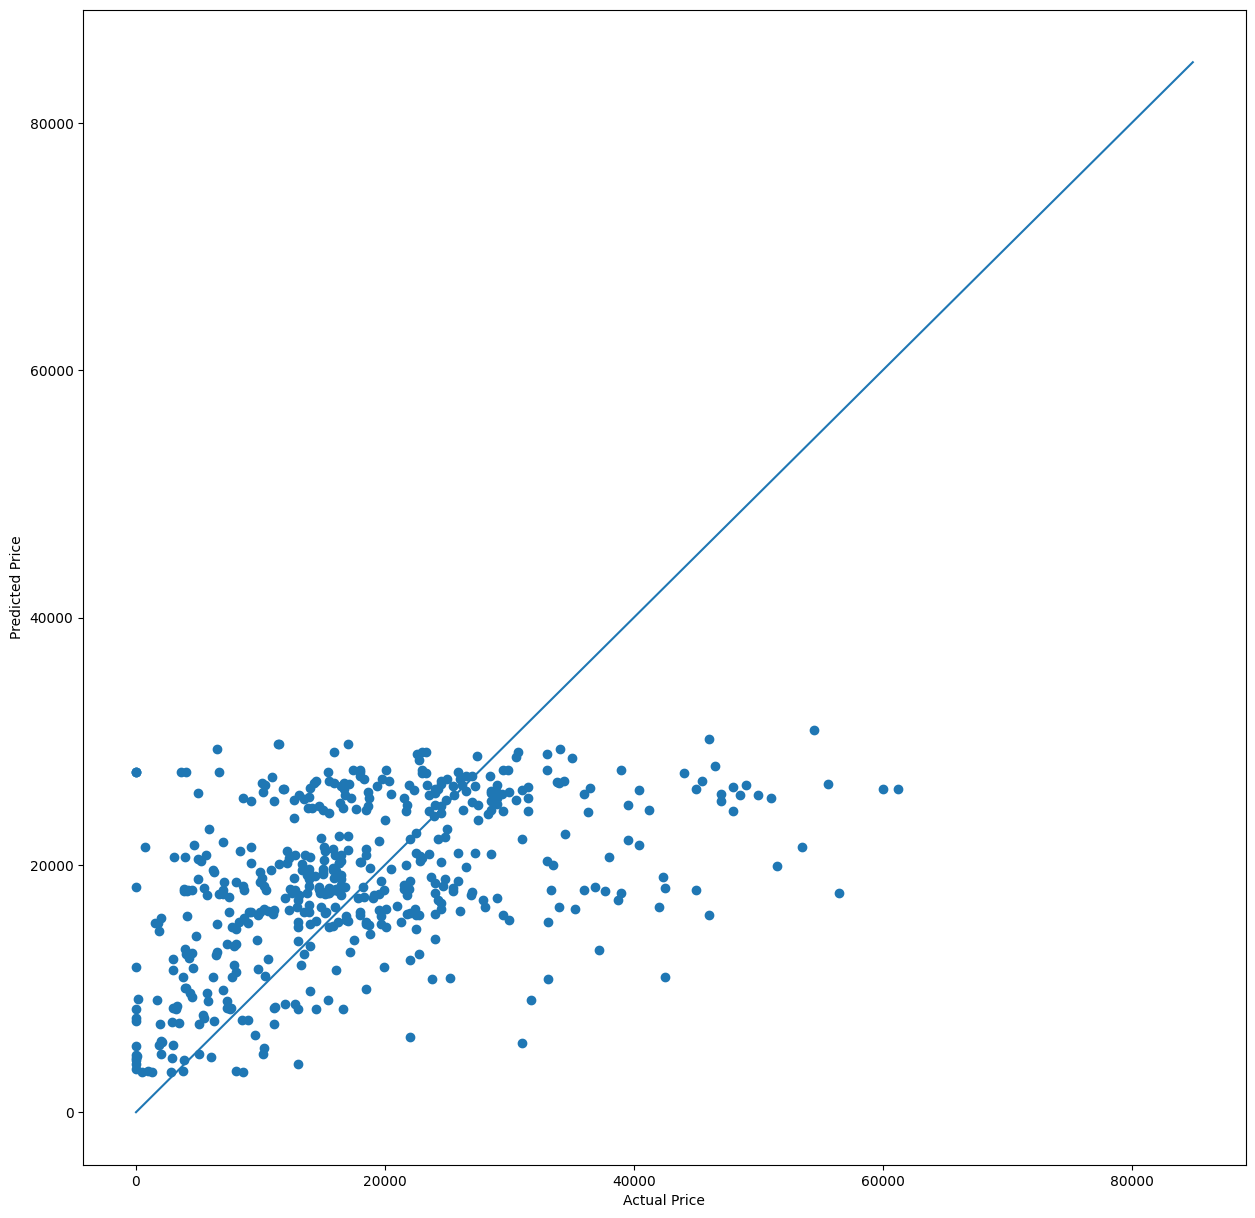

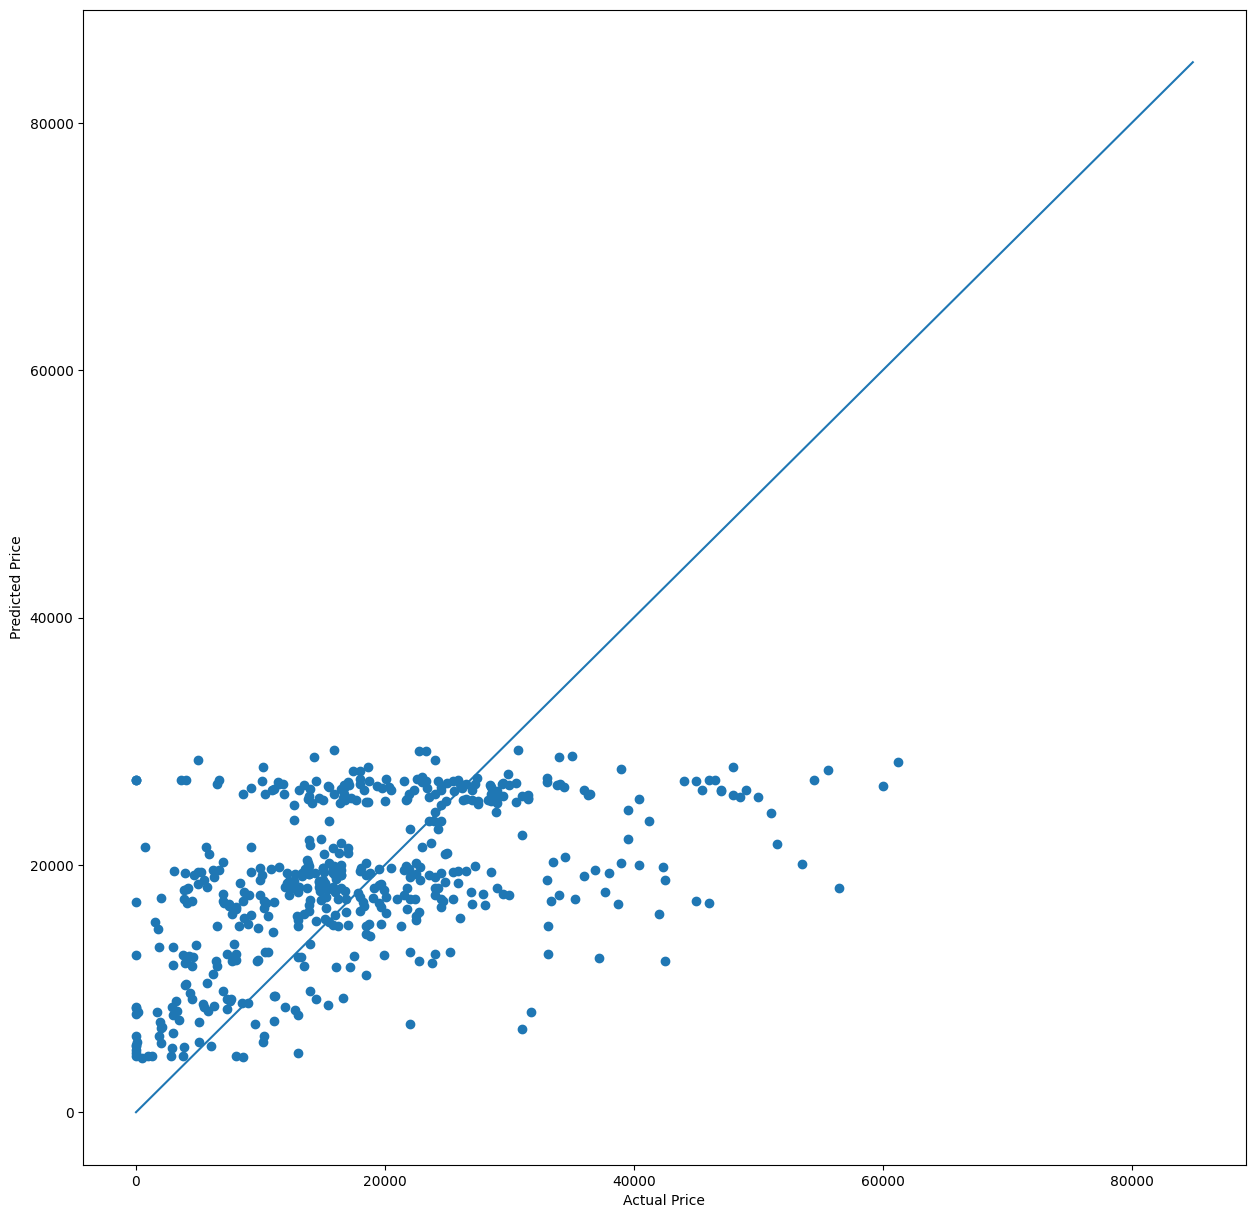

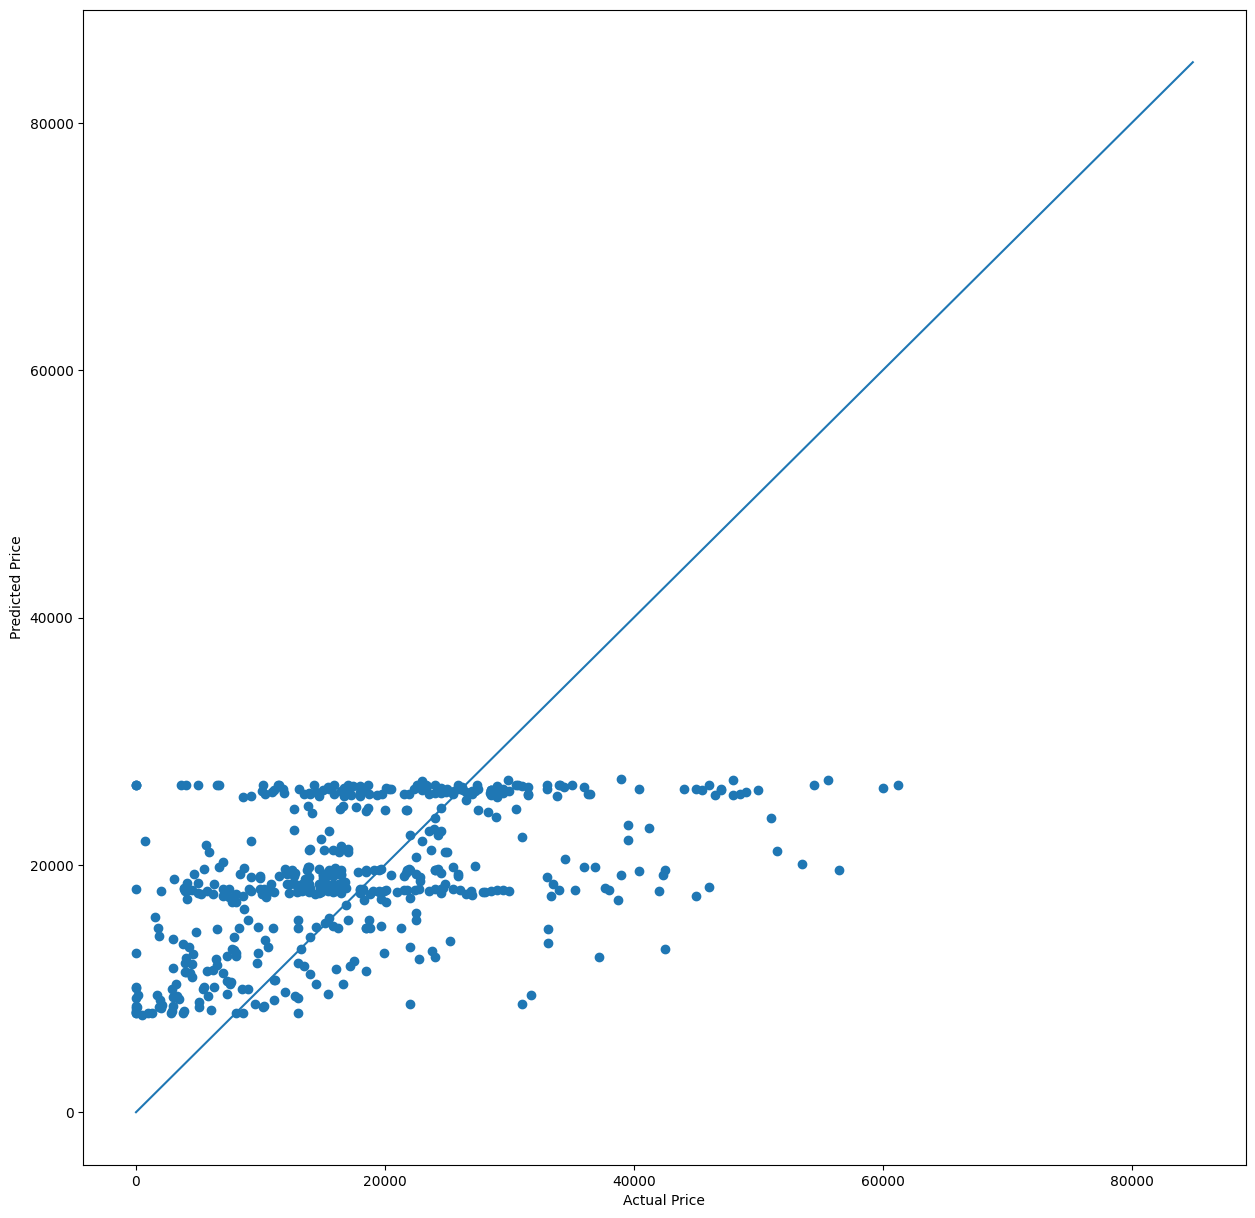

In [158]:
# Q2 4
from sklearn.neighbors import KNeighborsRegressor

k = [3, 10, 25, 50, 100, 300] # k values
newvec = [] # empty vector

for i in k:
    model = KNeighborsRegressor(n_neighbors=i) # Create a sk model that will iterate through k
    fitted_model = model.fit(x_train,y_train)
    y_hat = fitted_model.predict(x_test)
    SSE = ((y_test - y_hat)**2).sum()
    newvec.append((k, y_hat, SSE))

for i, y_hat, SSE in newvec: # plot each iteration
    SSEs = SSE.item()
    plt.figure(figsize=(15,15))
    plt.scatter(y_test, y_hat)
    plt.plot([y.min(), y.max()], [y.min(), y.max()])
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')

As k increases, the model seems to improve and the data points become more closesly consolidated.

In [175]:
# Q2 5
SSE_min = np.min(SSE) # Lowest recorded SSE
index_min = np.where(SSE==SSE_min)
opt_k = k[index_min]
print('The optimal k value is: ', opt_k)

TypeError: ignored

Q2 6
When the k values are small, like 3 and 10, the graph is overfitting the data, meaning it does not do well at predicting accurately. However, as k gets bigger, the model becomes more accurate at prediction.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [146]:
# Q3 1
heart_failure_df = pd.read_csv('/content/assignment3/data/heart_failure_clinical_records_dataset.csv')
nas2 = heart_failure_df.isna().sum()
print(nas2)

heart_failure_df = heart_failure_df.drop('time', axis = 1)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


There are no NA's to handle.

In [161]:
# Q3 2
c_matrix = heart_failure_df.corr()
assoc_w_death = c_matrix['DEATH_EVENT'].sort_values()
print(assoc_w_death)

ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64


The two variables with the highest correlation to death are age and serum_creatinine, but high_blood_pressure, anaemia, and creatinine_phosphokinase are also correlated.

In [162]:
# Q3 3
dummies = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
summary_table = {}

for i in dummies:
  summary_table[i] = heart_failure_df.groupby(i)['DEATH_EVENT'].mean()

print(summary_table)

{'anaemia': anaemia
0    0.294118
1    0.356589
Name: DEATH_EVENT, dtype: float64, 'diabetes': diabetes
0    0.321839
1    0.320000
Name: DEATH_EVENT, dtype: float64, 'high_blood_pressure': high_blood_pressure
0    0.293814
1    0.371429
Name: DEATH_EVENT, dtype: float64, 'sex': sex
0    0.323810
1    0.319588
Name: DEATH_EVENT, dtype: float64, 'smoking': smoking
0    0.325123
1    0.312500
Name: DEATH_EVENT, dtype: float64}


When the variable takes the value 1 for both anaemia and high_blood_pressure, a higher proportion of the population die.

In [163]:
# Q3 4
# x and y values for a matrix most predictive of death
x = heart_failure_df[['age','serum_creatinine', 'high_blood_pressure','anaemia']]
y = heart_failure_df['DEATH_EVENT']

death_matrix = [x,y]

In [164]:
# Q3 5
x_normalized = x.apply(maxmin) #using function from question 1
x_normalized.head()

,age,serum_creatinine,high_blood_pressure,anaemia
0,0.636364,0.157303,1.0,0.0
1,0.272727,0.067416,0.0,0.0
2,0.454545,0.089888,0.0,0.0
3,0.181818,0.157303,0.0,1.0
4,0.454545,0.247191,0.0,1.0


In [165]:
# Q3 6
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_normalized,y,test_size=.2,train_size=.8,random_state=50)

In [169]:
# Q3 7
from sklearn.metrics import mean_squared_error
k_bar = 70
k_grid = np.arange(1,k_bar)
MSEv = []

for i in k_grid:
    model = KNeighborsRegressor(i)
    fitted_model = model.fit(x_train,y_train)
    y_hat = model.predict(x_test)
    MSE = mean_squared_error(y_test, y_hat)
    MSEv.append(MSE)

opt_k = k_grid[MSEv.index(min(MSEv))]
print('the optimal k value is: ', opt_k)

the optimal k value is:  12


In [168]:
# Q3 8
x_all_variables = heart_failure_df.drop(columns=['DEATH_EVENT']) # get rid of death event
x_all_normalized = x_all_variables.apply(maxmin)

from sklearn.model_selection import train_test_split
all_x_train, all_x_test, all_y_train, all_y_test = train_test_split(x_all_normalized,y,test_size=.2,train_size=.8,random_state=50)
#print(all_x_train)


all_MSEv = []
for i in k_grid:
    model = KNeighborsRegressor(i)
    fitted_model = model.fit(all_x_train,all_y_train)
    y_hat = model.predict(all_x_test)
    all_MSE = mean_squared_error(all_y_test, y_hat)
    all_MSEv.append(all_MSE)

all_opt_k = k_grid[all_MSEv.index(min(all_MSEv))]
print('The optimal k value is: ',opt_k)


The optimal k value is:  63


Q3 8
The model generalizing all of the data has a lower SSE. In something as important as death rates, it is essential to have the most accurate model. I would chose the second model, because the SSE shows us that it is more accurate.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?